<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [5]:
!pip install seaborn
import pandas as pd


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [7]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download file: HTTP Status Code {response.status_code}")

In [8]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [10]:
download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [11]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [12]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


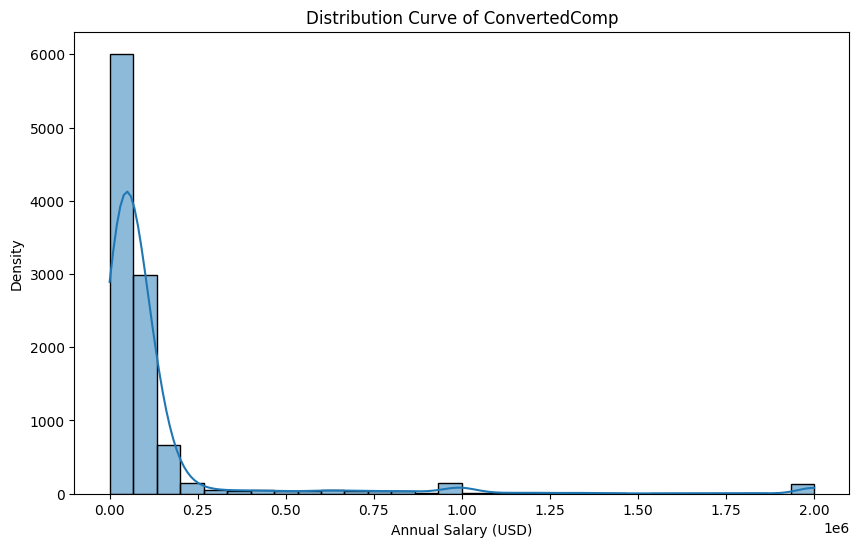

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), kde=True, bins=30)

# Add titles and labels
plt.title('Distribution Curve of ConvertedComp')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


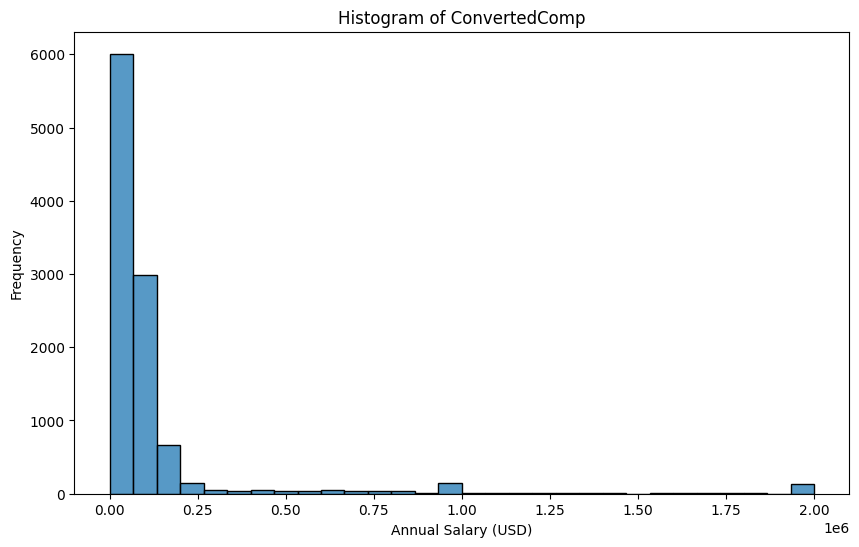

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), kde=False, bins=30)
plt.title('Histogram of ConvertedComp')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [16]:
median_converted_comp = df['ConvertedComp'].median()

print(f'The median of ConvertedComp is: {median_converted_comp}')


The median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [17]:
num_men_respondents = df[df['Gender'] == 'Man'].shape[0]

print(f'The number of responders who identified themselves only as a Man is: {num_men_respondents}')



The number of responders who identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
women_respondents = df[df['Gender'] == 'Woman']

# Calculate the median of 'ConvertedComp'
median_converted_comp_women = women_respondents['ConvertedComp'].median()

print(f'The median ConvertedComp for respondents identified as a Woman is: {median_converted_comp_women}')


The median ConvertedComp for respondents identified as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
five_number_summary_age = df['Age'].describe(percentiles=[.25, .5, .75])

print(five_number_summary_age)


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


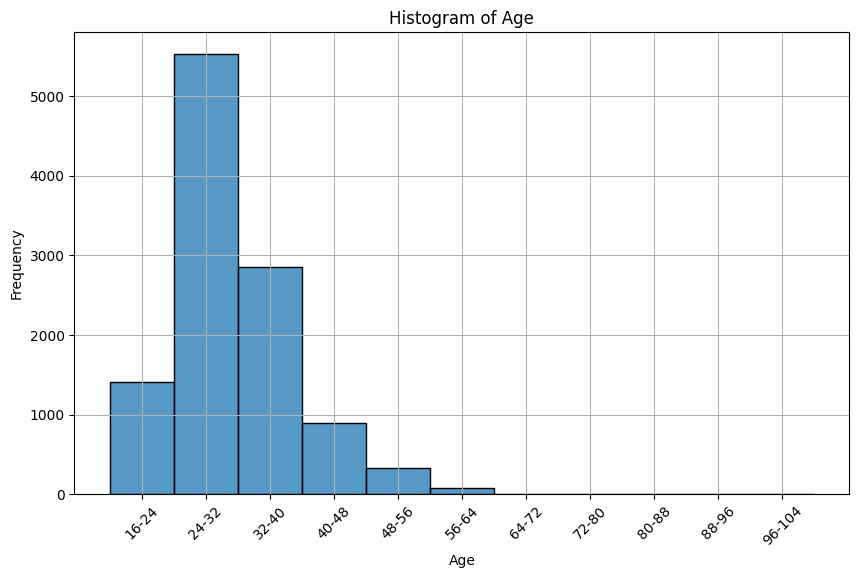

In [25]:
min_age = df['Age'].min()
max_age = df['Age'].max()

bin_size = 8
bins = range(int(min_age), int(max_age) + bin_size, bin_size)

bin_labels = [f'{i}-{i+bin_size}' for i in bins[:-1]]

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=False, bins=bins)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.xticks(ticks=[i + bin_size / 2 for i in bins[:-1]], labels=bin_labels, rotation=45)

plt.grid(True)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


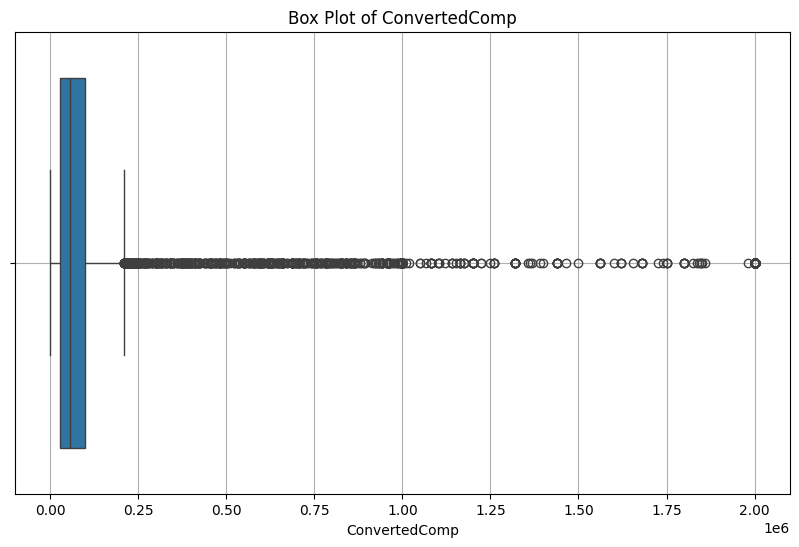

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'].dropna())
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.grid(True)
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [31]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

median_converted_comp_before = df['ConvertedComp'].median()

print(f'The median of ConvertedComp before removing outliers is: {median_converted_comp_before}')

print(f'Interquartile Range (IQR) for ConvertedComp: {IQR}')

The median of ConvertedComp before removing outliers is: 57745.0
Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')


Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [33]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]

outliers_below_Q1 = df[df['Age'] < lower_bound]

num_outliers_below_Q1 = outliers_below_Q1.shape[0]

print(f'Number of outliers below Q1: {num_outliers_below_Q1}')

print(f'Number of outliers in ConvertedComp: {num_outliers}')


Number of outliers below Q1: 0
Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [34]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

median_converted_comp_after = df_no_outliers['ConvertedComp'].median()

print(f'The median of ConvertedComp after removing outliers is: {median_converted_comp_after}')

mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

print(f'The mean of ConvertedComp after removing outliers is: {mean_converted_comp_after}')

print(f'Original DataFrame size: {df.shape[0]}')
print(f'New DataFrame size: {df_no_outliers.shape[0]}')


The median of ConvertedComp before removing outliers is: 52704.0
The mean of ConvertedComp before removing outliers is: 59883.20838915799
Original DataFrame size: 11398
New DataFrame size: 9703


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [36]:
numerical_cols = df.select_dtypes(include='number')

correlation_matrix = numerical_cols.corr()

age_correlation = correlation_matrix['Age']

print('Correlation of Age with other numerical columns:')
print(age_correlation)

age_correlation_excluded = age_correlation.drop('Age')

highest_correlation_col = age_correlation_excluded.idxmax()
highest_correlation_value = age_correlation_excluded.max()

negative_correlation_cols = age_correlation[age_correlation < 0]

print('Columns with negative correlation with Age:')
print(negative_correlation_cols)

print(f'Column with the highest correlation with Age: {highest_correlation_col}')
print(f'Highest correlation value: {highest_correlation_value}')

Correlation of Age with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64
Columns with negative correlation with Age:
CodeRevHrs   -0.020469
Name: Age, dtype: float64
Column with the highest correlation with Age: ConvertedComp
Highest correlation value: 0.10538616072629158


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
